# Explore merchant data

In [203]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.ticker as tick
import matplotlib as matplotlib
import seaborn as sb

### Import data

In [204]:
orders = pd.read_csv("/Users/daniellaframboise/Documents/Internships/2019/data/orders.csv")
order_items = pd.read_csv("/Users/daniellaframboise/Documents/Internships/2019/data/order_items.csv")

In [205]:
orders.head()

,id,customer,placed_on,total_cost,total_tax,subtotal
0,1,4,2017-03-05 16:55:52,884.34,101.74,782.60
1,2,22,2015-09-05 10:20:52,972.40,111.87,860.53
2,3,19,2016-01-24 11:38:27,105.91,12.18,93.73
3,4,10,2016-04-25 10:43:25,647.20,74.46,572.74
4,5,4,2017-12-02 06:27:31,343.27,39.49,303.78


In [206]:
order_items.head()

,id,order,product_variation,price,quantity
0,1,1,66,9.61,3
1,2,1,1,11.53,2
2,3,1,30,15.35,3
3,4,1,60,72.47,2
4,5,1,13,125.26,3


### Explore merging data

In [207]:
data = orders.merge(order_items, left_on='id', right_on='order')

In [208]:
data.head()

,id_x,customer,placed_on,total_cost,total_tax,subtotal,id_y,order,product_variation,price,quantity
0,1,4,2017-03-05 16:55:52,884.34,101.74,782.6,1,1,66,9.61,3
1,1,4,2017-03-05 16:55:52,884.34,101.74,782.6,2,1,1,11.53,2
2,1,4,2017-03-05 16:55:52,884.34,101.74,782.6,3,1,30,15.35,3
3,1,4,2017-03-05 16:55:52,884.34,101.74,782.6,4,1,60,72.47,2
4,1,4,2017-03-05 16:55:52,884.34,101.74,782.6,5,1,13,125.26,3


In [209]:
data.dtypes

id_x                   int64
customer               int64
placed_on             object
total_cost           float64
total_tax            float64
subtotal             float64
id_y                   int64
order                  int64
product_variation      int64
price                float64
quantity               int64
dtype: object

In [210]:
data['placed_on'] = pd.to_datetime(data['placed_on'])

In [211]:
data.dtypes

id_x                          int64
customer                      int64
placed_on            datetime64[ns]
total_cost                  float64
total_tax                   float64
subtotal                    float64
id_y                          int64
order                         int64
product_variation             int64
price                       float64
quantity                      int64
dtype: object

In [212]:
data = data.rename(index=str, columns={"id_x": "id","id_y": "order_item_id"})

In [213]:
data.head()

,id,customer,placed_on,total_cost,total_tax,subtotal,order_item_id,order,product_variation,price,quantity
0,1,4,2017-03-05 16:55:52,884.34,101.74,782.6,1,1,66,9.61,3
1,1,4,2017-03-05 16:55:52,884.34,101.74,782.6,2,1,1,11.53,2
2,1,4,2017-03-05 16:55:52,884.34,101.74,782.6,3,1,30,15.35,3
3,1,4,2017-03-05 16:55:52,884.34,101.74,782.6,4,1,60,72.47,2
4,1,4,2017-03-05 16:55:52,884.34,101.74,782.6,5,1,13,125.26,3


### Import product data

In [214]:
products = pd.read_csv("/Users/daniellaframboise/Documents/Internships/2019/data/products.csv")
product_variations = pd.read_csv("/Users/daniellaframboise/Documents/Internships/2019/data/product_variations.csv")

In [215]:
products.head()

,id,merchant,name,description,price,sku
0,1,2,Large table,A great table,102.12,8437152631
1,2,11,Cotton t-shirt,100% cotton t-shirt,11.99,1437367336
2,3,3,Wool coat,Sturdy 100% wool,400.50,3977592277
3,4,4,See-through corded telephone,NaN,26.78,8241503020
4,5,3,V-neck t-shirt,100% cotton,10.00,4556771762


In [216]:
product_variations.head()

,id,product,name
0,1,2,Red
1,2,11,Small
2,3,10,Green
3,4,23,Checkered
4,5,10,Blue


In [217]:
# Drop columns that won't be used
products.drop(['description', 'sku'], inplace=True, axis=1)

In [218]:
products.head()

,id,merchant,name,price
0,1,2,Large table,102.12
1,2,11,Cotton t-shirt,11.99
2,3,3,Wool coat,400.50
3,4,4,See-through corded telephone,26.78
4,5,3,V-neck t-shirt,10.00


### Merge data with product_variations

In [219]:
data = data.merge(product_variations, left_on='product_variation', right_on='id')

In [220]:
data.head()

,id_x,customer,placed_on,total_cost,total_tax,subtotal,order_item_id,order,product_variation,price,quantity,id_y,product,name
0,1,4,2017-03-05 16:55:52,884.34,101.74,782.60,1,1,66,9.61,3,66,37,Sandalwood
1,22,18,2014-08-21 21:26:03,200.70,23.09,177.61,120,22,66,9.08,1,66,37,Sandalwood
2,26,22,2015-05-22 03:54:27,676.10,77.78,598.32,141,26,66,9.29,1,66,37,Sandalwood
3,29,20,2017-10-06 09:21:19,120.93,13.91,107.02,157,29,66,9.74,2,66,37,Sandalwood
4,30,3,2017-01-26 18:49:36,221.29,25.46,195.83,160,30,66,9.63,1,66,37,Sandalwood


In [221]:
data = data.rename(index=str, columns={"id_x": "id","id_y": "prod_var_id"})

In [222]:
data.head()

,id,customer,placed_on,total_cost,total_tax,subtotal,order_item_id,order,product_variation,price,quantity,prod_var_id,product,name
0,1,4,2017-03-05 16:55:52,884.34,101.74,782.60,1,1,66,9.61,3,66,37,Sandalwood
1,22,18,2014-08-21 21:26:03,200.70,23.09,177.61,120,22,66,9.08,1,66,37,Sandalwood
2,26,22,2015-05-22 03:54:27,676.10,77.78,598.32,141,26,66,9.29,1,66,37,Sandalwood
3,29,20,2017-10-06 09:21:19,120.93,13.91,107.02,157,29,66,9.74,2,66,37,Sandalwood
4,30,3,2017-01-26 18:49:36,221.29,25.46,195.83,160,30,66,9.63,1,66,37,Sandalwood


### Merge data on products

In [223]:
data = data.merge(products, left_on='product', right_on='id')

In [224]:
data.head()

,id_x,customer,placed_on,total_cost,total_tax,subtotal,order_item_id,order,product_variation,price_x,quantity,prod_var_id,product,name_x,id_y,merchant,name_y,price_y
0,1,4,2017-03-05 16:55:52,884.34,101.74,782.60,1,1,66,9.61,3,66,37,Sandalwood,37,4,Wooden bowl,10.0
1,22,18,2014-08-21 21:26:03,200.70,23.09,177.61,120,22,66,9.08,1,66,37,Sandalwood,37,4,Wooden bowl,10.0
2,26,22,2015-05-22 03:54:27,676.10,77.78,598.32,141,26,66,9.29,1,66,37,Sandalwood,37,4,Wooden bowl,10.0
3,29,20,2017-10-06 09:21:19,120.93,13.91,107.02,157,29,66,9.74,2,66,37,Sandalwood,37,4,Wooden bowl,10.0
4,30,3,2017-01-26 18:49:36,221.29,25.46,195.83,160,30,66,9.63,1,66,37,Sandalwood,37,4,Wooden bowl,10.0


In [225]:
data = data.rename(index=str, columns={
    "id_x": "id",
    "price_x": "price",
    'name_x': 'variation_name',
    'name_y': 'name',
    'price_y': 'current_price',
    'product': 'product_id'
})

In [226]:
data.head()

,id,customer,placed_on,total_cost,total_tax,subtotal,order_item_id,order,product_variation,price,quantity,prod_var_id,product_id,variation_name,id_y,merchant,name,current_price
0,1,4,2017-03-05 16:55:52,884.34,101.74,782.60,1,1,66,9.61,3,66,37,Sandalwood,37,4,Wooden bowl,10.0
1,22,18,2014-08-21 21:26:03,200.70,23.09,177.61,120,22,66,9.08,1,66,37,Sandalwood,37,4,Wooden bowl,10.0
2,26,22,2015-05-22 03:54:27,676.10,77.78,598.32,141,26,66,9.29,1,66,37,Sandalwood,37,4,Wooden bowl,10.0
3,29,20,2017-10-06 09:21:19,120.93,13.91,107.02,157,29,66,9.74,2,66,37,Sandalwood,37,4,Wooden bowl,10.0
4,30,3,2017-01-26 18:49:36,221.29,25.46,195.83,160,30,66,9.63,1,66,37,Sandalwood,37,4,Wooden bowl,10.0


In [227]:
# Drop unused columns
data.drop(['order', 'id_y', 'product_variation'], inplace=True, axis=1)

In [228]:
data.head()

,id,customer,placed_on,total_cost,total_tax,subtotal,order_item_id,price,quantity,prod_var_id,product_id,variation_name,merchant,name,current_price
0,1,4,2017-03-05 16:55:52,884.34,101.74,782.60,1,9.61,3,66,37,Sandalwood,4,Wooden bowl,10.0
1,22,18,2014-08-21 21:26:03,200.70,23.09,177.61,120,9.08,1,66,37,Sandalwood,4,Wooden bowl,10.0
2,26,22,2015-05-22 03:54:27,676.10,77.78,598.32,141,9.29,1,66,37,Sandalwood,4,Wooden bowl,10.0
3,29,20,2017-10-06 09:21:19,120.93,13.91,107.02,157,9.74,2,66,37,Sandalwood,4,Wooden bowl,10.0
4,30,3,2017-01-26 18:49:36,221.29,25.46,195.83,160,9.63,1,66,37,Sandalwood,4,Wooden bowl,10.0


### Begin Plotting

In [229]:
# Start with item #37 - A wooden bowl
wooden_bowls = data.loc[data['product_id'] == 37]

In [230]:
wooden_bowls.describe()

,id,customer,total_cost,total_tax,subtotal,order_item_id,price,quantity,prod_var_id,product_id,merchant,current_price
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.0,34.0,34.0
mean,83.500000,16.235294,608.876765,70.048235,538.828529,456.705882,9.326471,2.088235,66.705882,37.0,4.0,10.0
std,56.966896,9.204936,353.097607,40.622529,312.475078,303.364320,0.284795,0.865768,0.970143,0.0,0.0,0.0
min,1.000000,1.000000,37.530000,4.320000,33.210000,1.000000,8.930000,1.000000,66.000000,37.0,4.0,10.0
25%,33.750000,7.250000,395.297500,45.477500,349.820000,193.000000,9.092500,1.000000,66.000000,37.0,4.0,10.0
50%,56.500000,18.500000,574.670000,66.110000,508.560000,319.500000,9.260000,2.000000,66.000000,37.0,4.0,10.0
75%,134.000000,23.000000,871.492500,100.260000,771.232500,724.000000,9.497500,3.000000,68.000000,37.0,4.0,10.0
max,195.000000,31.000000,1621.440000,186.540000,1434.900000,1036.000000,9.970000,3.000000,68.000000,37.0,4.0,10.0


In [231]:
# Sort dataframe by date
wooden_bowls.sort_values(by=['placed_on'], inplace=True, ascending=True)

/Users/daniellaframboise/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [232]:
wooden_bowls.head()

,id,customer,placed_on,total_cost,total_tax,subtotal,order_item_id,price,quantity,prod_var_id,product_id,variation_name,merchant,name,current_price
18,147,27,2014-02-16 16:09:51,1054.78,121.35,933.43,794,8.93,3,66,37,Sandalwood,4,Wooden bowl,10.0
31,150,11,2014-02-17 01:25:58,795.57,91.53,704.04,818,8.99,3,68,37,Pine,4,Wooden bowl,10.0
11,48,22,2014-04-16 14:31:36,1001.82,115.25,886.57,278,9.00,2,66,37,Sandalwood,4,Wooden bowl,10.0
17,143,31,2014-06-14 15:30:40,149.95,17.25,132.70,764,9.03,3,66,37,Sandalwood,4,Wooden bowl,10.0
10,44,23,2014-08-15 16:54:29,1062.69,122.26,940.43,262,9.13,1,66,37,Sandalwood,4,Wooden bowl,10.0


#### Quick example to show how to get mean, std, min, max, etc by year

In [233]:
# Isolate the wooden bowls for the year 2014 only
wooden_bowls_2014 = wooden_bowls[wooden_bowls['placed_on'].dt.year == 2014]

In [234]:
# Get the mean of each column
wooden_bowls_2014.mean()

id               108.928571
customer          20.142857
total_cost       640.531429
total_tax         73.690000
subtotal         566.841429
order_item_id    593.642857
price              9.075714
quantity           2.285714
prod_var_id       66.714286
product_id        37.000000
merchant           4.000000
current_price     10.000000
dtype: float64

In [235]:
# Isolate and get only mean of price
wooden_bowls_2014['price'].mean()

9.075714285714287

#### Back to plotting

In [236]:
list_of_datetimes = wooden_bowls['placed_on']

In [238]:
prices = wooden_bowls['price']

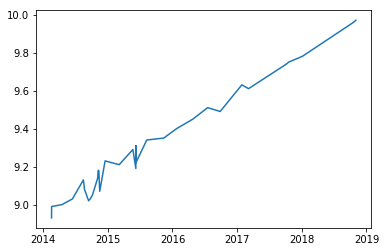

In [239]:
plt.plot(list_of_datetimes, prices)

### Plot another item

In [240]:
wool_coats = data.loc[data['product_id'] == 3]

In [241]:
wool_coats.sort_values(by=['placed_on'], inplace=True, ascending=True)

/Users/daniellaframboise/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
